# HOME CREDIT SCORECARD MODEL

`Author : Isaac Dwadattusyah Haikal Azziz @2022` 

`Rakamin Academy - VIX with Home Credit - Final Project`

Final Project to predict incoming client (in test data) either can pay the given loan without any difficulties (Target = 0) or will have problem in paying loans (Target = 1) using provided train data. 

`Goals` : 

- Inferring insight & recommendation from data 

- Create a model from the features given in the training data (including logistic regression)

- Predicting Clients in Test Data using model created from Training Data 

`Section/Step` : 

- Import Package & Data Used

- Data Exploration, Visualization, and Insight from Data

- Data Cleaning

- Model Building

- Predict Client Class (Target) in Data Testing

In [1]:
# Module Requirements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn import over_sampling, under_sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

# Import & Basic Data Profilling

In [2]:
# Import Data
Train_Data = pd.read_csv('D:/[P]roject/Pasca-Kuliah/Course/Rakamin/VIX/Home Credit/Task/Data/application_train.csv')
Test_Data = pd.read_csv('D:/[P]roject/Pasca-Kuliah/Course/Rakamin/VIX/Home Credit/Task/Data/application_test.csv')

# Copy Train Data For Backup
Train_Data_Backup = Train_Data.copy()

In [3]:
# Peek Sample of Data
print('Data Sample')
print(tabulate(Train_Data.sample(10, random_state=10), headers = 'keys', tablefmt = 'grid'))
print("This Train Dataframe consist of %d row (clients) and %d column (feature)" %Train_Data.shape)

Data Sample
+--------+--------------+----------+----------------------+---------------+----------------+-------------------+----------------+--------------------+-----------------+---------------+-------------------+-------------------+----------------------+-------------------------------+----------------------+---------------------+------------------------------+--------------+-----------------+---------------------+-------------------+---------------+--------------+------------------+-------------------+--------------------+--------------+--------------+-------------------+-------------------+------------------------+-------------------------------+------------------------------+---------------------------+------------------------------+------------------------------+-------------------------------+--------------------------+--------------------------+---------------------------+------------------------+----------------+----------------+----------------+------------------+----------

In [4]:
# Train_Data Column and Type
print(Train_Data.info(verbose=True, show_counts = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
# Grouping Categorical & Numerical Variable
continuous_vars = []
categorical_vars = []
int_vars = []

for i in Train_Data.columns:
  if Train_Data[i].dtype == 'object':
    categorical_vars.append(i)
  elif Train_Data[i].dtype == 'float64':
    continuous_vars.append(i)
  else:
    int_vars.append(i)

print('Count of Float Vars: ',len(continuous_vars))
print('Float Vars: ',continuous_vars)
print()
print('Count of Categorical Vars: ',len(categorical_vars))
print('Categorical Vars = ',categorical_vars)
print()
print('Count of Integer Vars: ',len(int_vars))
print('Integer Vars = ',int_vars)

Count of Float Vars:  65
Float Vars:  ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LA

# Data Exploration & Visualization

`---------------------------------- Client w/ Payment Difficulties vs Client w/o Payment Difficulties ----------------------------------`

There is 282686 clients with payment difficulties, and 24825 clients without payment difficulties in Train Data


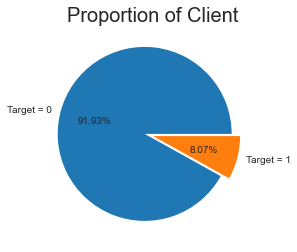

Credit Amt per Target
+----+----------+--------------+
|    |   TARGET |   AMT_CREDIT |
+====+==========+==============+
|  0 |        0 |  1.7036e+11  |
+----+----------+--------------+
|  1 |        1 |  1.38469e+10 |
+----+----------+--------------+
From train data, About 13,85 Billion is used to fund clients with Target = 1. That mean companies Risked that amount of fund throughout train data


In [8]:
# How Many Clients Grouped by Payment Difficulties
target_sum = Train_Data.groupby('TARGET')['SK_ID_CURR'].count()

# Pie Plot
print("There is %d clients with payment difficulties, and %d clients without payment difficulties in Train Data" %(target_sum[0], target_sum[1]))
plt.style.use('seaborn-whitegrid')
plt.pie([str(len(Train_Data[Train_Data['TARGET'] == 0])), str(len(Train_Data[Train_Data['TARGET'] == 1]))],
        labels=['Target = 0', 'Target = 1'], 
        autopct='%.2f%%',
        explode = [0.1, 0])
plt.title('Proportion of Client', fontsize = 20)
plt.show()

# Fund in Risk
fund = Train_Data.groupby('TARGET')['AMT_CREDIT'].sum().reset_index()
fund['AMT_CREDIT'] = fund['AMT_CREDIT'].apply(lambda x : str(x))
print('Credit Amt per Target')
print(tabulate(fund, headers = 'keys', tablefmt = 'grid'))
print('From train data, About 13,85 Billion is used to fund clients with Target = 1. That mean companies Risked that amount of fund throughout train data')


`Insight` : `Target`

From above chart proportion, we can see a huge gap of proportion between `Targets`, as clients without any payment difficulties (`Targets` = 0) dominating with 91.93% compared with 8.07 percents of clients who have payment difficulties (`Targets` = 1).

`------------------------------------------------- DEFINE FUNCTION TO DESCRIBE & PLOTTING -------------------------------------------------`

Use function to reduce code repetition

For in the rest of source code, I use `PROPORTION` (Which was proportion of that clients class to all clients) & `RELATIVE PROPORTION` (same as proportion, but only to clients in same category)

In [9]:
# Define Describe Function
def describe_group(data = Train_Data, first_group = 'TARGET', second_group = 'NAME_CONTRACT_TYPE', agg_col = 'SK_ID_CURR', function = 'count'):
    print('Client %s and Proportion based to %s and %s' %(function.capitalize(), first_group.lower(), second_group.lower()))

    if function == 'count':
        df_iter = Train_Data.groupby([second_group, first_group])[agg_col].count().reset_index().rename({agg_col: 'COUNT OF ' + agg_col.upper()}, axis=1)
        df_iter['PROPORTION'] = df_iter['COUNT OF ' + agg_col.upper()]*100 / len(data)
        df_iter['RELATIVE PROPORTION'] = df_iter['PROPORTION'].copy()
        for i in range(len(df_iter)):
            df_iter['RELATIVE PROPORTION'][i] = df_iter['PROPORTION'][i] / sum(df_iter[df_iter[second_group] == df_iter[second_group][i]]['PROPORTION'])
        df_iter['PROPORTION'] = df_iter['PROPORTION'].apply(lambda x : str(round(x,2))+'%')
        df_iter['RELATIVE PROPORTION'] = df_iter['RELATIVE PROPORTION'].apply(lambda x : str(round(x*100,2))+'%')
    elif function == 'sum':
        df_iter = Train_Data.groupby([second_group, first_group])[agg_col].sum().reset_index().rename({agg_col: 'SUM OF ' + agg_col.upper()}, axis=1)
    else:
        raise KeyError('Type Aggregation not Supported')

    if first_group == 'TARGET':
        df_iter['TARGET'] = ['Got Payment Difficulties' if x == 1 else 'No Payment Difficulties' for x in df_iter['TARGET']]
    
    df_iter.sort_values(second_group, ascending = True)
    print(tabulate(df_iter, headers = 'keys', tablefmt = 'grid'))
    print()

# Define Plotting Function
def plotting_group(data = Train_Data, first_group = 'TARGET', second_group = 'NAME_CONTRACT_TYPE', agg_col = 'SK_ID_CURR', function = 'count'): 
    if function == 'count':
        df_iter = Train_Data.groupby([first_group, second_group])[agg_col].count().reset_index().rename({agg_col: 'COUNT OF ' + agg_col.upper()}, axis=1)
        if first_group == 'TARGET':
            df_iter['TARGET'] = ['Got Payment Difficulties' if x == 1 else 'No Payment Difficulties' for x in df_iter['TARGET']]
        g = sns.barplot(data = df_iter, x = second_group, y = 'COUNT OF ' + agg_col.upper(), hue = first_group, palette = 'bright')
        g.set_title('Count Plot based to %s and %s' %(first_group.upper(), second_group.upper()))
        g.set_ylabel('Client Count')
    elif function == 'sum':
        df_iter = Train_Data.groupby([first_group, second_group])[agg_col].sum().reset_index().rename({agg_col: 'SUM OF ' + agg_col.upper()}, axis=1)
        if first_group == 'TARGET':
            df_iter['TARGET'] = ['Got Payment Difficulties' if x == 1 else 'No Payment Difficulties' for x in df_iter['TARGET']]
        g = sns.barplot(data = df_iter, x = second_group, y = 'SUM OF ' + agg_col.upper(), hue = first_group, palette = 'bright')
        g.set_title('Bar Plot based to %s and %s' %(first_group.upper(), second_group.upper()))
    elif function == 'avg':
        df_iter = Train_Data.groupby([first_group])[agg_col].mean().reset_index().rename({agg_col: 'MEAN OF ' + agg_col.upper()}, axis=1)
        if first_group == 'TARGET':
            df_iter['TARGET'] = ['Got Payment Difficulties' if x == 1 else 'No Payment Difficulties' for x in df_iter['TARGET']]
        g = sns.barplot(data = df_iter, x = first_group, y = 'MEAN OF ' + agg_col.upper(), palette = 'bright')
        g.set_title('Bar Plot based to %s and %s' %(first_group.upper(), agg_col.upper()))
    else:
        raise KeyError('Type Aggregation not Supported')
    
    if len(df_iter) > 8:
        plt.xticks(rotation = 45)
    plt.show()

`------------------------------------------------- CATEGORY VARIABLE VISUALIZATION & INSIGHT -------------------------------------------------`

`CATEGORY VARIABLE : 'NAME_CONTRACT_TYPE'`

Client Count and Proportion based to target and name_contract_type
+----+----------------------+--------------------------+-----------------------+--------------+-----------------------+
|    | NAME_CONTRACT_TYPE   | TARGET                   |   COUNT OF SK_ID_CURR | PROPORTION   | RELATIVE PROPORTION   |
+====+======================+==========================+=======================+==============+=======================+
|  0 | Cash loans           | No Payment Difficulties  |                255011 | 82.93%       | 91.65%                |
+----+----------------------+--------------------------+-----------------------+--------------+-----------------------+
|  1 | Cash loans           | Got Payment Difficulties |                 23221 | 7.55%        | 8.35%                 |
+----+----------------------+--------------------------+-----------------------+--------------+-----------------------+
|  2 | Revolving loans      | No Payment Difficulties  |                 27675 | 9.0%        

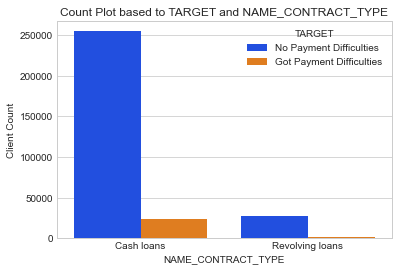

In [10]:
# NAME_CONTRACT_TYPE vs TARGET DATA COUNT
describe_group(data = Train_Data, first_group = 'TARGET', second_group = 'NAME_CONTRACT_TYPE', agg_col = 'SK_ID_CURR', function = 'count')
# PLOT NAME_CONTRACT_TYPE vs TARGET DATA COUNT
plotting_group(data = Train_Data, first_group = 'TARGET', second_group = 'NAME_CONTRACT_TYPE', agg_col = 'SK_ID_CURR', function = 'count')

`Insight` : `NAME_CONTRACT_TYPE`

Most Clients (~90%) take `Cash Loans` instead of `Revolving Loans`

From the plot and relative proportion, Clients who take `Cash Loans` have higher chance (about 3%) to get payment difficulties than Clients with `Revolving Loans`.

`-------------------------------------------------------------------------------------------------------------------------------`

`CATEGORY VARIABLE : 'CODE_GENDER'`

Client Count and Proportion based to target and code_gender
+----+---------------+--------------------------+-----------------------+--------------+-----------------------+
|    | CODE_GENDER   | TARGET                   |   COUNT OF SK_ID_CURR | PROPORTION   | RELATIVE PROPORTION   |
+====+===============+==========================+=======================+==============+=======================+
|  0 | F             | No Payment Difficulties  |                188278 | 61.23%       | 93.0%                 |
+----+---------------+--------------------------+-----------------------+--------------+-----------------------+
|  1 | F             | Got Payment Difficulties |                 14170 | 4.61%        | 7.0%                  |
+----+---------------+--------------------------+-----------------------+--------------+-----------------------+
|  2 | M             | No Payment Difficulties  |                 94404 | 30.7%        | 89.86%                |
+----+---------------+--------------

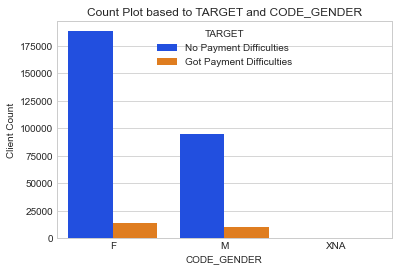

In [11]:
# CODE_GENDER vs TARGET DATA COUNT
describe_group(data = Train_Data, first_group = 'TARGET', second_group = 'CODE_GENDER', agg_col = 'SK_ID_CURR', function = 'count')
# PLOT CODE_GENDER vs TARGET DATA COUNT
plotting_group(data = Train_Data, first_group = 'TARGET', second_group = 'CODE_GENDER', agg_col = 'SK_ID_CURR', function = 'count')

`Insight` : `CODE_GENDER`

Most Clients (~65%) are `Female`

From the plot and relative proportion, `Male` Clients have higher chance (about 3%) to get payment difficulties than `Female` Clients.

`-------------------------------------------------------------------------------------------------------------------------------`

`CATEGORY VARIABLE : 'FLAG_OWN_CAR'`

Client Count and Proportion based to target and flag_own_car
+----+----------------+--------------------------+-----------------------+--------------+-----------------------+
|    | FLAG_OWN_CAR   | TARGET                   |   COUNT OF SK_ID_CURR | PROPORTION   | RELATIVE PROPORTION   |
+====+================+==========================+=======================+==============+=======================+
|  0 | N              | No Payment Difficulties  |                185675 | 60.38%       | 91.5%                 |
+----+----------------+--------------------------+-----------------------+--------------+-----------------------+
|  1 | N              | Got Payment Difficulties |                 17249 | 5.61%        | 8.5%                  |
+----+----------------+--------------------------+-----------------------+--------------+-----------------------+
|  2 | Y              | No Payment Difficulties  |                 97011 | 31.55%       | 92.76%                |
+----+----------------+----

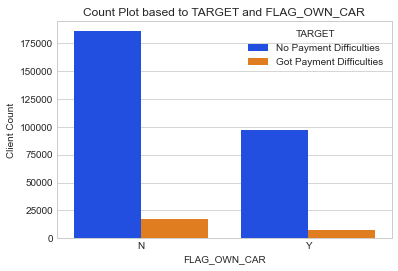

In [12]:
# FLAG_OWN_CAR vs TARGET DATA COUNT
describe_group(data = Train_Data, first_group = 'TARGET', second_group = 'FLAG_OWN_CAR', agg_col = 'SK_ID_CURR', function = 'count')
# PLOT FLAG_OWN_CAR vs TARGET DATA COUNT
plotting_group(data = Train_Data, first_group = 'TARGET', second_group = 'FLAG_OWN_CAR', agg_col = 'SK_ID_CURR', function = 'count')

`Insight` : `FLAG_OWN_CAR`

Most Clients (~65%) `Doesnt Have Car`

From the plot and relative proportion, There is no significant difference of target proportion.

`-------------------------------------------------------------------------------------------------------------------------------`

`CATEGORY VARIABLE : 'FLAG_OWN_REALTY'`

Client Count and Proportion based to target and flag_own_realty
+----+-------------------+--------------------------+-----------------------+--------------+-----------------------+
|    | FLAG_OWN_REALTY   | TARGET                   |   COUNT OF SK_ID_CURR | PROPORTION   | RELATIVE PROPORTION   |
+====+===================+==========================+=======================+==============+=======================+
|  0 | N                 | No Payment Difficulties  |                 86357 | 28.08%       | 91.68%                |
+----+-------------------+--------------------------+-----------------------+--------------+-----------------------+
|  1 | N                 | Got Payment Difficulties |                  7842 | 2.55%        | 8.32%                 |
+----+-------------------+--------------------------+-----------------------+--------------+-----------------------+
|  2 | Y                 | No Payment Difficulties  |                196329 | 63.84%       | 92.04%                |


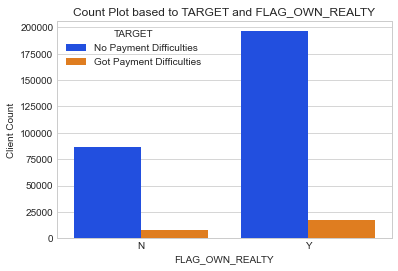

In [13]:
# FLAG_OWN_REALTY vs TARGET DATA COUNT
describe_group(data = Train_Data, first_group = 'TARGET', second_group = 'FLAG_OWN_REALTY', agg_col = 'SK_ID_CURR', function = 'count')
# PLOT FLAG_OWN_REALTY vs TARGET DATA COUNT
plotting_group(data = Train_Data, first_group = 'TARGET', second_group = 'FLAG_OWN_REALTY', agg_col = 'SK_ID_CURR', function = 'count')

`Insight` : `FLAG_OWN_REALTY`

Most Clients (~67%)  `Do Own Realty`

From the plot and relative proportion, There is no significant difference of target proportion.

`-------------------------------------------------------------------------------------------------------------------------------`

`CATEGORY VARIABLE : 'NAME_TYPE_SUITE'`

Client Count and Proportion based to target and name_type_suite
+----+-------------------+--------------------------+-----------------------+--------------+-----------------------+
|    | NAME_TYPE_SUITE   | TARGET                   |   COUNT OF SK_ID_CURR | PROPORTION   | RELATIVE PROPORTION   |
+====+===================+==========================+=======================+==============+=======================+
|  0 | Children          | No Payment Difficulties  |                  3026 | 0.98%        | 92.62%                |
+----+-------------------+--------------------------+-----------------------+--------------+-----------------------+
|  1 | Children          | Got Payment Difficulties |                   241 | 0.08%        | 7.38%                 |
+----+-------------------+--------------------------+-----------------------+--------------+-----------------------+
|  2 | Family            | No Payment Difficulties  |                 37140 | 12.08%       | 92.51%                |


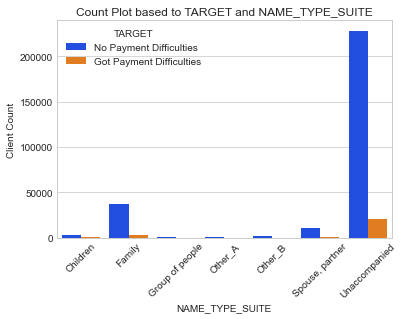

In [14]:
# NAME_TYPE_SUITE vs TARGET DATA COUNT
describe_group(data = Train_Data, first_group = 'TARGET', second_group = 'NAME_TYPE_SUITE', agg_col = 'SK_ID_CURR', function = 'count')
# PLOT NAME_TYPE_SUITE vs TARGET DATA COUNT
plotting_group(data = Train_Data, first_group = 'TARGET', second_group = 'NAME_TYPE_SUITE', agg_col = 'SK_ID_CURR', function = 'count')

`Insight` : `NAME_TYPE_SUITE`

Most Clients (~81%) is `Unaccompanied`

From the plot and relative proportion, There is no significant difference of target proportion. but Clients accompanied with `Other_b` have higher chance to had difficulties in paying back credit.

`-------------------------------------------------------------------------------------------------------------------------------`

`CATEGORY VARIABLE : 'NAME_INCOME_TYPE'`

Client Count and Proportion based to target and name_income_type
+----+----------------------+--------------------------+-----------------------+--------------+-----------------------+
|    | NAME_INCOME_TYPE     | TARGET                   |   COUNT OF SK_ID_CURR | PROPORTION   | RELATIVE PROPORTION   |
+====+======================+==========================+=======================+==============+=======================+
|  0 | Businessman          | No Payment Difficulties  |                    10 | 0.0%         | 100.0%                |
+----+----------------------+--------------------------+-----------------------+--------------+-----------------------+
|  1 | Commercial associate | No Payment Difficulties  |                 66257 | 21.55%       | 92.52%                |
+----+----------------------+--------------------------+-----------------------+--------------+-----------------------+
|  2 | Commercial associate | Got Payment Difficulties |                  5360 | 1.74%        |

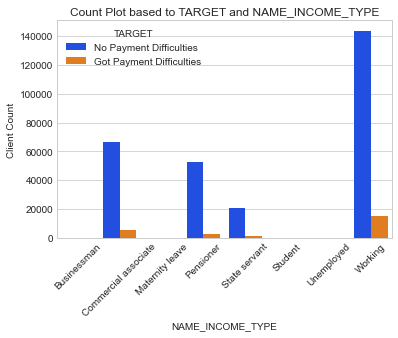

In [15]:
# NAME_INCOME_TYPE vs TARGET DATA COUNT
describe_group(data = Train_Data, first_group = 'TARGET', second_group = 'NAME_INCOME_TYPE', agg_col = 'SK_ID_CURR', function = 'count')
# PLOT NAME_INCOME_TYPE vs TARGET DATA COUNT
plotting_group(data = Train_Data, first_group = 'TARGET', second_group = 'NAME_INCOME_TYPE', agg_col = 'SK_ID_CURR', function = 'count')

`Insight` : `NAME_INCOME_TYPE`

Most Clients (~51%) is `Working`

From the plot and relative proportion, Clients that have income type `Unemployed` & `Maternity Leave` have higher chance to had difficulties in paying back credit regardless of both category had least sample as well.

`-------------------------------------------------------------------------------------------------------------------------------`

`CATEGORY VARIABLE : 'NAME_EDUCATION_TYPE'`

Client Count and Proportion based to target and name_education_type
+----+-------------------------------+--------------------------+-----------------------+--------------+-----------------------+
|    | NAME_EDUCATION_TYPE           | TARGET                   |   COUNT OF SK_ID_CURR | PROPORTION   | RELATIVE PROPORTION   |
+====+===============================+==========================+=======================+==============+=======================+
|  0 | Academic degree               | No Payment Difficulties  |                   161 | 0.05%        | 98.17%                |
+----+-------------------------------+--------------------------+-----------------------+--------------+-----------------------+
|  1 | Academic degree               | Got Payment Difficulties |                     3 | 0.0%         | 1.83%                 |
+----+-------------------------------+--------------------------+-----------------------+--------------+-----------------------+
|  2 | Higher education      

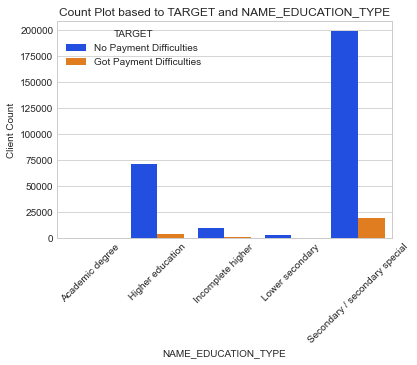

In [16]:
# NAME_EDUCATION_TYPE vs TARGET DATA COUNT
describe_group(data = Train_Data, first_group = 'TARGET', second_group = 'NAME_EDUCATION_TYPE', agg_col = 'SK_ID_CURR', function = 'count')
# PLOT NAME_EDUCATION_TYPE vs TARGET DATA COUNT
plotting_group(data = Train_Data, first_group = 'TARGET', second_group = 'NAME_EDUCATION_TYPE', agg_col = 'SK_ID_CURR', function = 'count')

`Insight` : `NAME_EDUCATION_TYPE`

Most Clients (~70%) have studied at `Secondary School`

From the plot and relative proportion, Clients that have studied at `Lower Secondary` have higher chance to had difficulties in paying back credit.

`-------------------------------------------------------------------------------------------------------------------------------`

`CATEGORY VARIABLE : 'NAME_FAMILY_STATUS'`

Client Count and Proportion based to target and name_family_status
+----+----------------------+--------------------------+-----------------------+--------------+-----------------------+
|    | NAME_FAMILY_STATUS   | TARGET                   |   COUNT OF SK_ID_CURR | PROPORTION   | RELATIVE PROPORTION   |
+====+======================+==========================+=======================+==============+=======================+
|  0 | Civil marriage       | No Payment Difficulties  |                 26814 | 8.72%        | 90.06%                |
+----+----------------------+--------------------------+-----------------------+--------------+-----------------------+
|  1 | Civil marriage       | Got Payment Difficulties |                  2961 | 0.96%        | 9.94%                 |
+----+----------------------+--------------------------+-----------------------+--------------+-----------------------+
|  2 | Married              | No Payment Difficulties  |                181582 | 59.05%      

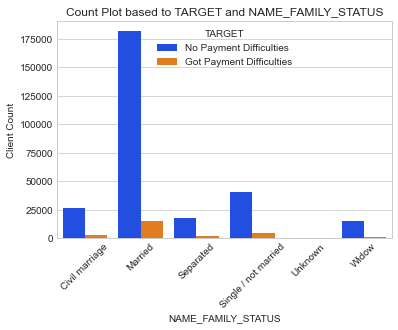

In [17]:
# NAME_FAMILY_STATUS vs TARGET DATA COUNT
describe_group(data = Train_Data, first_group = 'TARGET', second_group = 'NAME_FAMILY_STATUS', agg_col = 'SK_ID_CURR', function = 'count')
# PLOT NAME_FAMILY_STATUS vs TARGET DATA COUNT
plotting_group(data = Train_Data, first_group = 'TARGET', second_group = 'NAME_FAMILY_STATUS', agg_col = 'SK_ID_CURR', function = 'count')

`Insight` : `NAME_FAMILY_STATUS`

Most Clients (~63%) is `Married`

From the plot and relative proportion, There is no significant difference of target proportion.

`-------------------------------------------------------------------------------------------------------------------------------`

`CATEGORY VARIABLE : 'NAME_HOUSING_TYPE'`

Client Count and Proportion based to target and name_housing_type
+----+---------------------+--------------------------+-----------------------+--------------+-----------------------+
|    | NAME_HOUSING_TYPE   | TARGET                   |   COUNT OF SK_ID_CURR | PROPORTION   | RELATIVE PROPORTION   |
+====+=====================+==========================+=======================+==============+=======================+
|  0 | Co-op apartment     | No Payment Difficulties  |                  1033 | 0.34%        | 92.07%                |
+----+---------------------+--------------------------+-----------------------+--------------+-----------------------+
|  1 | Co-op apartment     | Got Payment Difficulties |                    89 | 0.03%        | 7.93%                 |
+----+---------------------+--------------------------+-----------------------+--------------+-----------------------+
|  2 | House / apartment   | No Payment Difficulties  |                251596 | 81.82%       | 92.2% 

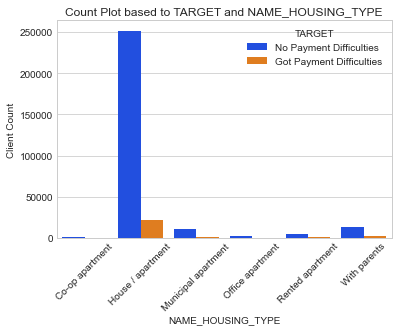

In [18]:
# NAME_HOUSING_TYPE vs TARGET DATA COUNT
describe_group(data = Train_Data, first_group = 'TARGET', second_group = 'NAME_HOUSING_TYPE', agg_col = 'SK_ID_CURR', function = 'count')
# PLOT NAME_HOUSING_TYPE vs TARGET DATA COUNT
plotting_group(data = Train_Data, first_group = 'TARGET', second_group = 'NAME_HOUSING_TYPE', agg_col = 'SK_ID_CURR', function = 'count')

`Insight` : `NAME_HOUSING_TYPE`

Most Clients (~88%) have been livin at its own `House/Apartement`

From the plot and relative proportion, Clients who still living at `Rented Apartement` & `With Parent` has higher chance to had difficulties at paying back loans.


`------------------------------------------------- NUMERIC VARIABLE VISUALIZATION & INSIGHT -------------------------------------------------`

`CATEGORY VARIABLE : 'REGION_RATING_CLIENT'`

Client Count and Proportion based to target and region_rating_client
+----+------------------------+--------------------------+-----------------------+--------------+-----------------------+
|    |   REGION_RATING_CLIENT | TARGET                   |   COUNT OF SK_ID_CURR | PROPORTION   | RELATIVE PROPORTION   |
+====+========================+==========================+=======================+==============+=======================+
|  0 |                      1 | No Payment Difficulties  |                 30645 | 9.97%        | 95.18%                |
+----+------------------------+--------------------------+-----------------------+--------------+-----------------------+
|  1 |                      1 | Got Payment Difficulties |                  1552 | 0.5%         | 4.82%                 |
+----+------------------------+--------------------------+-----------------------+--------------+-----------------------+
|  2 |                      2 | No Payment Difficulties  |                209

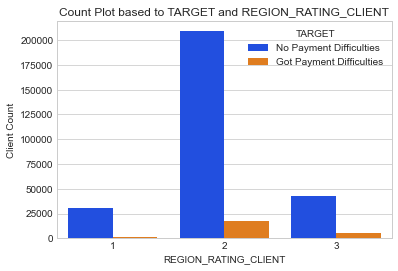

In [19]:
# REGION_RATING_CLIENT vs TARGET DATA COUNT
describe_group(data = Train_Data, first_group = 'TARGET', second_group = 'REGION_RATING_CLIENT', agg_col = 'SK_ID_CURR', function = 'count')
# PLOT REGION_RATING_CLIENT vs TARGET DATA COUNT
plotting_group(data = Train_Data, first_group = 'TARGET', second_group = 'REGION_RATING_CLIENT', agg_col = 'SK_ID_CURR', function = 'count')

`Insight` : `REGION_RATING_CLIENT`

Most Clients (~88%) have been livin in Region rating `2` area

From the plot and relative proportion, There's clear cut of relation between `Area Rating` and `Proportion of Clients` who having difficulties in paying loans. Clients who living in Higher rating (3) area have higher chance to having difficulties in paying loans

`-------------------------------------------------------------------------------------------------------------------------------`

`CATEGORY VARIABLE : 'REGION_RATING_CLIENT_W_CITY'`

Client Count and Proportion based to target and region_rating_client_w_city
+----+-------------------------------+--------------------------+-----------------------+--------------+-----------------------+
|    |   REGION_RATING_CLIENT_W_CITY | TARGET                   |   COUNT OF SK_ID_CURR | PROPORTION   | RELATIVE PROPORTION   |
+====+===============================+==========================+=======================+==============+=======================+
|  0 |                             1 | No Payment Difficulties  |                 32513 | 10.57%       | 95.16%                |
+----+-------------------------------+--------------------------+-----------------------+--------------+-----------------------+
|  1 |                             1 | Got Payment Difficulties |                  1654 | 0.54%        | 4.84%                 |
+----+-------------------------------+--------------------------+-----------------------+--------------+-----------------------+
|  2 |               

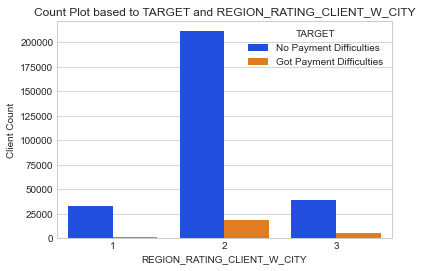

In [20]:
# REGION_RATING_CLIENT_W_CITY vs TARGET DATA COUNT
describe_group(data = Train_Data, first_group = 'TARGET', second_group = 'REGION_RATING_CLIENT_W_CITY', agg_col = 'SK_ID_CURR', function = 'count')
# PLOT REGION_RATING_CLIENT_W_CITY vs TARGET DATA COUNT
plotting_group(data = Train_Data, first_group = 'TARGET', second_group = 'REGION_RATING_CLIENT_W_CITY', agg_col = 'SK_ID_CURR', function = 'count')

`Insight` : `REGION_RATING_CLIENT_W_CITY`

Same as `REGION_RATING`, Most Clients (~88%) have been livin in Region rating `2` area

From the plot and relative proportion, There's clear cut of relation between `REGION_RATING_CLIENT_W_CITY` and `Proportion of Clients` who having difficulties in paying loans. Clients who living in Higher rating (3) area have higher chance to having difficulties in paying loans

`-------------------------------------------------------------------------------------------------------------------------------`

`INTEGER VARIABLE : 'CNT_CHILDREN'`

Client Count and Proportion based to target and cnt_children
+----+----------------+--------------------------+-----------------------+--------------+-----------------------+
|    |   CNT_CHILDREN | TARGET                   |   COUNT OF SK_ID_CURR | PROPORTION   | RELATIVE PROPORTION   |
+====+================+==========================+=======================+==============+=======================+
|  0 |              0 | No Payment Difficulties  |                198762 | 64.64%       | 92.29%                |
+----+----------------+--------------------------+-----------------------+--------------+-----------------------+
|  1 |              0 | Got Payment Difficulties |                 16609 | 5.4%         | 7.71%                 |
+----+----------------+--------------------------+-----------------------+--------------+-----------------------+
|  2 |              1 | No Payment Difficulties  |                 55665 | 18.1%        | 91.08%                |
+----+----------------+----

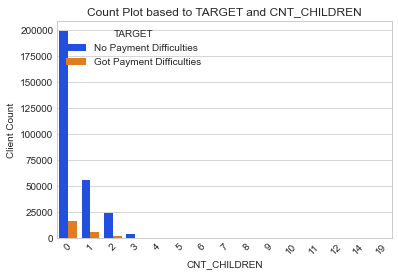

In [21]:
# CNT_CHILDREN vs TARGET DATA COUNT
describe_group(data = Train_Data, first_group = 'TARGET', second_group = 'CNT_CHILDREN', agg_col = 'SK_ID_CURR', function = 'count')
# PLOT CNT_CHILDREN vs TARGET DATA COUNT
plotting_group(data = Train_Data, first_group = 'TARGET', second_group = 'CNT_CHILDREN', agg_col = 'SK_ID_CURR', function = 'count')

`Insight` : `CNT_CHILDREN`

There is blurry indication of correlation between `Number of Children` and `Proportion of Clients who has difficulties in paying loans`. Higher the child count, higher the proportion. But this argument cannot be proved as lack of sample in children count > 3. Better safe than sorry though.

`-------------------------------------------------------------------------------------------------------------------------------`

`INTEGER VARIABLE : 'CNT_FAM_MEMBERS'`

Client Count and Proportion based to target and cnt_fam_members
+----+-------------------+--------------------------+-----------------------+--------------+-----------------------+
|    |   CNT_FAM_MEMBERS | TARGET                   |   COUNT OF SK_ID_CURR | PROPORTION   | RELATIVE PROPORTION   |
+====+===================+==========================+=======================+==============+=======================+
|  0 |                 1 | No Payment Difficulties  |                 62172 | 20.22%       | 91.64%                |
+----+-------------------+--------------------------+-----------------------+--------------+-----------------------+
|  1 |                 1 | Got Payment Difficulties |                  5675 | 1.85%        | 8.36%                 |
+----+-------------------+--------------------------+-----------------------+--------------+-----------------------+
|  2 |                 2 | No Payment Difficulties  |                146348 | 47.59%       | 92.42%                |


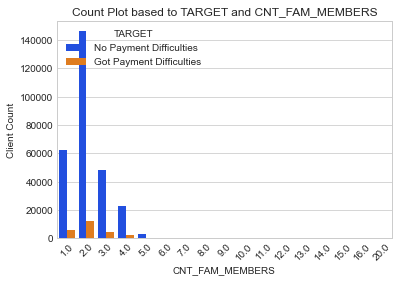

In [22]:
# CNT_FAM_MEMBERS vs TARGET DATA COUNT
describe_group(data = Train_Data, first_group = 'TARGET', second_group = 'CNT_FAM_MEMBERS', agg_col = 'SK_ID_CURR', function = 'count')
# PLOT CNT_FAM_MEMBERS vs TARGET DATA COUNT
plotting_group(data = Train_Data, first_group = 'TARGET', second_group = 'CNT_FAM_MEMBERS', agg_col = 'SK_ID_CURR', function = 'count')

`Insight` : `CNT_FAM_MEMBERS`

Same as `CNT_CHILDREN`, There is also blurry indication of correlation between `Number of Fam_Members` and `Proportion of Clients who has difficulties in paying loans`. Higher the fam_members count, higher the proportion. But this argument cannot be proved as lack of sample in family members count > 4.

`-------------------------------------------------------------------------------------------------------------------------------`

`CONTINUOUS VARIABLE : 'AMT_INCOME_TOTAL'`

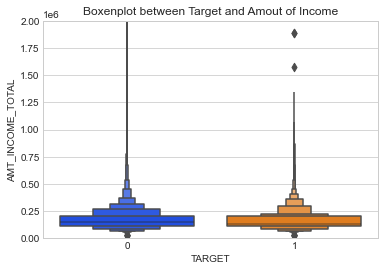

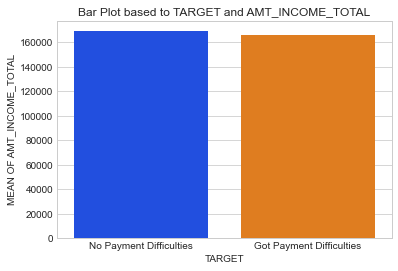

In [23]:
# Make The PLot
g = sns.boxenplot(data = Train_Data, x = 'TARGET', y = 'AMT_INCOME_TOTAL', palette = 'bright')
g.set_title('Boxenplot between Target and Amout of Income')
plt.ylim([0, 2000000])
plt.show()

plotting_group(data = Train_Data, first_group = 'TARGET', agg_col = 'AMT_INCOME_TOTAL', function = 'avg')

`Insight` : `CNT_FAM_MEMBERS`

There is no clear difference (or little difference) between the distribution of income amount in both target class (0/1).

`-------------------------------------------------------------------------------------------------------------------------------`

`CONTINUOUS VARIABLE : 'AMT_CREDIT'`

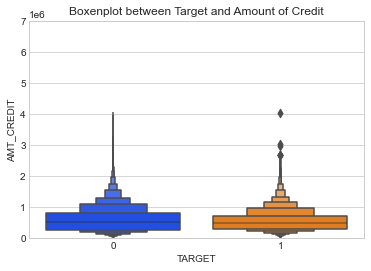

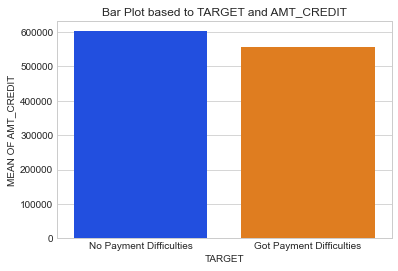

In [24]:
# Make The PLot
g = sns.boxenplot(data = Train_Data, x = 'TARGET', y = 'AMT_CREDIT', palette = 'bright')
g.set_title('Boxenplot between Target and Amount of Credit')
plt.ylim([0, 7000000])
plt.show()

plotting_group(data = Train_Data, first_group = 'TARGET', agg_col = 'AMT_CREDIT', function = 'avg')

`Insight` : `AMT_CREDIT`

There is no clear difference (or little difference) either between the distribution of credit amount in both target class (0/1).

`-------------------------------------------------------------------------------------------------------------------------------`

`CONTINUOUS VARIABLE / INTEGER (Depends on context) : 'AGE'`

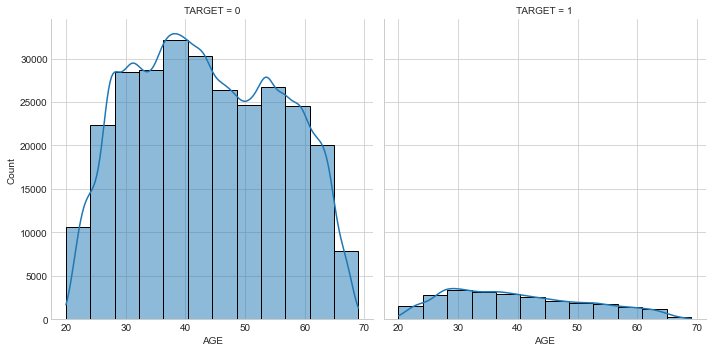

In [25]:
# Create New Variable in Dataframe Named `Age`
Train_Data['AGE'] = np.floor(abs(Train_Data['DAYS_BIRTH'])/365).apply(lambda x : int(x))

# Make Boxenplot of Age vs Target
g = sns.displot(data = Train_Data, x = 'AGE', col = 'TARGET', kind = 'hist', palette = 'bright', bins = 12, kde = True)
plt.show()

`Insight` : `AGE`

There is no clear difference (or little difference) either between the distribution of Age (in years) in both target class (0/1). 

However, there is blurry line for this age distribution that most clients who do not have credit problems are in the age modes 35, and clients who have credit problem are in age modes 30.

# Data Cleaning

`------------------------------------------------------------ DATA DESCRIBE ------------------------------------------------------------`

In [26]:
# Data Describe
print(tabulate(Train_Data.describe(include="all").transpose(), headers = 'keys', tablefmt = 'grid'))

+------------------------------+---------+----------+-------------------------------+--------+------------------+-----------------+------------------+---------------+---------------+---------------+---------------+
|                              |   count |   unique | top                           |   freq |             mean |             std |              min |           25% |           50% |           75% |           max |
+==============================+=========+==========+===============================+========+==================+=================+==================+===============+===============+===============+===============+
| SK_ID_CURR                   |  307511 |      nan | nan                           |    nan | 278181           | 102790          | 100002           | 189146        | 278202        | 367142        | 456255        |
+------------------------------+---------+----------+-------------------------------+--------+------------------+-----------------+---------

From df.describe(), We can see all column (atributes) and its characteristic. We also can drop column that we dont need/dont meet criteria:
    
- Drop `ORGANIZATION_TYPE` because have too many unique value, prone to overfitting
    
- Drop `AGE`. That column and `DAYS_BIRTH` basically same column though. Delete one of them

- Drop `SK_ID_CURR`, That column was index col (supposed so) and not fit to be an feature in model

In [27]:
ByeByee = ['ORGANIZATION_TYPE', 'AGE', 'SK_ID_CURR']
Train_Data.drop(ByeByee, inplace=True, axis=1)

`---------------------------------------------------- DUPLICATED DATA TREATMENT ----------------------------------------------------`

In [29]:
# Checking Any Duplicate Row
Train_Data.duplicated(subset = None).sum()

#Drop Duplicate (If Any)
#Train_Data.drop_duplicates() 

0

There is no Duplicated Data (No Need to Drop Duplicate)

`---------------------------------------------------- MISSING DATA TREATMENT ----------------------------------------------------`

For missing data, Column will be dropped if proportion of missing data > 40%. Different type of columns also have different treatment

- For Numerical Column, Replace with `Median`

- For Categorical Column, Replace with `Modes`

In [30]:
# Missing Data Precentage
for column in Train_Data.columns:
  length = len(Train_Data[column])
  number_of_missing = Train_Data[column].isna().sum()
  precentage_of_missing = number_of_missing*100/length
  print('Precentage of Missing Value from Column ' + str(column) + ' is ' + str(format(precentage_of_missing, ".2f") + '%'))

Precentage of Missing Value from Column TARGET is 0.00%
Precentage of Missing Value from Column NAME_CONTRACT_TYPE is 0.00%
Precentage of Missing Value from Column CODE_GENDER is 0.00%
Precentage of Missing Value from Column FLAG_OWN_CAR is 0.00%
Precentage of Missing Value from Column FLAG_OWN_REALTY is 0.00%
Precentage of Missing Value from Column CNT_CHILDREN is 0.00%
Precentage of Missing Value from Column AMT_INCOME_TOTAL is 0.00%
Precentage of Missing Value from Column AMT_CREDIT is 0.00%
Precentage of Missing Value from Column AMT_ANNUITY is 0.00%
Precentage of Missing Value from Column AMT_GOODS_PRICE is 0.09%
Precentage of Missing Value from Column NAME_TYPE_SUITE is 0.42%
Precentage of Missing Value from Column NAME_INCOME_TYPE is 0.00%
Precentage of Missing Value from Column NAME_EDUCATION_TYPE is 0.00%
Precentage of Missing Value from Column NAME_FAMILY_STATUS is 0.00%
Precentage of Missing Value from Column NAME_HOUSING_TYPE is 0.00%
Precentage of Missing Value from Column

In [31]:
# Categorical & Numerical Variable Filter
numerical_vars = []
categorical_vars = []

for i in Train_Data.columns:
  if Train_Data[i].dtype == 'object':
    categorical_vars.append(i)
  else:
    numerical_vars.append(i)

For `Numerical Variable`,  Drop Column with Percentage of Missing values > 40%, If missing value < 40% replace it with median

In [32]:
# Numerical Variable Missing Data Treatment
for column in numerical_vars:
  portion_missing = Train_Data[column].isna().sum()/len(Train_Data[column])
  if portion_missing > 0.4:
    Train_Data.drop(column, axis=1, inplace = True)
    numerical_vars.remove(column)
  else:
    Train_Data[column].fillna(Train_Data[column].median(), inplace = True)

For `Categorical Variable`,  Drop Column with Percentage of Missing values > 40%, If missing value < 40% replace it with modes

In [33]:
# Categorical Variable Missing Data Treatment
for column in categorical_vars:
  portion_missing = Train_Data[column].isna().sum()/len(Train_Data[column])
  if portion_missing > 0.4:
    Train_Data.drop(column, axis=1, inplace = True)
    categorical_vars.remove(column)
  else:
    Train_Data[column].fillna(Train_Data[column].mode()[0], inplace = True)

In [34]:
# Missing Data in Column Kiling (In case we replace NA with Na in a column)
for column in Train_Data.columns:
  length = len(Train_Data[column])
  number_of_missing = Train_Data[column].isna().sum()
  precentage_of_missing = number_of_missing*100/length
  if precentage_of_missing > 40:
    Train_Data.drop(column, axis = 1, inplace = True)
Train_Data = Train_Data.fillna(Train_Data.median())

In [35]:
# Missing Data Precentage (Final Check)
for column in Train_Data.columns:
  length = len(Train_Data[column])
  number_of_missing = Train_Data[column].isna().sum()
  precentage_of_missing = number_of_missing*100/length
  print('Precentage of Missing Value from Column ' + str(column) + ' is ' + str(format(precentage_of_missing, ".2f") + '%'))

Precentage of Missing Value from Column TARGET is 0.00%
Precentage of Missing Value from Column NAME_CONTRACT_TYPE is 0.00%
Precentage of Missing Value from Column CODE_GENDER is 0.00%
Precentage of Missing Value from Column FLAG_OWN_CAR is 0.00%
Precentage of Missing Value from Column FLAG_OWN_REALTY is 0.00%
Precentage of Missing Value from Column CNT_CHILDREN is 0.00%
Precentage of Missing Value from Column AMT_INCOME_TOTAL is 0.00%
Precentage of Missing Value from Column AMT_CREDIT is 0.00%
Precentage of Missing Value from Column AMT_ANNUITY is 0.00%
Precentage of Missing Value from Column AMT_GOODS_PRICE is 0.00%
Precentage of Missing Value from Column NAME_TYPE_SUITE is 0.00%
Precentage of Missing Value from Column NAME_INCOME_TYPE is 0.00%
Precentage of Missing Value from Column NAME_EDUCATION_TYPE is 0.00%
Precentage of Missing Value from Column NAME_FAMILY_STATUS is 0.00%
Precentage of Missing Value from Column NAME_HOUSING_TYPE is 0.00%
Precentage of Missing Value from Column

Missing Data Problem has been Solved

`---------------------------------------------------- CLEANING IMPOSSIBLE VALUE & OUTLIER ----------------------------------------------------`

For Impossible Value, There should be no columns with negative values in the data (as long as the description in column_desc.csv is true).

In [36]:
# Categorical & Numerical Variable Filter (Again)
numerical_vars = []
categorical_vars = []

for i in Train_Data.columns:
    if Train_Data[i].dtype == 'object':
        categorical_vars.append(i)
    else:
        numerical_vars.append(i)

Negative_list = []
#Negative Value Detector
for i in numerical_vars:
    a = any(Train_Data[i]<0)
    if a == True:
        print('There is negative values found in %s column' %i)
        Negative_list.append(i)
        

There is negative values found in DAYS_BIRTH column
There is negative values found in DAYS_EMPLOYED column
There is negative values found in DAYS_REGISTRATION column
There is negative values found in DAYS_ID_PUBLISH column
There is negative values found in DAYS_LAST_PHONE_CHANGE column


The Solution for `Negative Values` is Do Absolute Transformation

In [37]:
#Transformation
for i in Negative_list:
    Train_Data[i] = abs(Train_Data[i])

#Negative Value Checker
for i in numerical_vars:
    a = any(Train_Data[i]<0)
    if a == True:
        print('There is negative values found in %s column' %i)

Negative Value Problem has been Solved

Another problem that must be solved in data cleaning is outlier, but in this case we will keep the outlier (assume there is no input error) to build/find the robust model to the outlier itself

# Model Building

`---------------------------------------------------- CATEGORICAL LABEL ENCODING ----------------------------------------------------`

In [38]:
# Categorical & Numerical Variable Filter (Again)
numerical_vars = []
categorical_vars = []

for i in Train_Data.columns:
  if Train_Data[i].dtype == 'object':
    categorical_vars.append(i)
  else:
    numerical_vars.append(i)

# Vars That Need Label Encoding
print(categorical_vars)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START']


In [39]:
# Label Encoder
Train_Data[categorical_vars] = Train_Data[categorical_vars].apply(preprocessing.LabelEncoder().fit_transform)

# Peek The Data After Transformation
print(tabulate(Train_Data.sample(10, random_state=10), headers = 'keys', tablefmt = 'grid'))

+--------+----------+----------------------+---------------+----------------+-------------------+----------------+--------------------+-----------------+---------------+-------------------+-------------------+--------------------+-----------------------+----------------------+---------------------+------------------------------+--------------+-----------------+---------------------+-------------------+--------------+------------------+-------------------+--------------------+--------------+--------------+-------------------+-------------------+------------------------+-------------------------------+------------------------------+---------------------------+------------------------------+------------------------------+-------------------------------+--------------------------+--------------------------+---------------------------+----------------+----------------+----------------------------+----------------------------+----------------------------+----------------------------+--------

`---------------------------------------------------- FEATURE SELECTION & TRAIN TEST SPLIT ----------------------------------------------------`

In [40]:
# Select Feature for X and Y
Y = Train_Data['TARGET']
X = Train_Data.drop('TARGET', axis = 1)

In [41]:
# Oversampling & Undersampling
rus = RandomUnderSampler(sampling_strategy=1)
X_Under, Y_Under = rus.fit_resample(X, Y)

ros = RandomOverSampler(sampling_strategy=1)
X_Over, Y_Over = ros.fit_resample(X, Y)

Next Step is Divide Each X and Y into Train and Validation (Test)

In [42]:
#Train Test Split 75:25
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=1)

#Shape
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(230633, 70)
(76878, 70)
(230633,)
(76878,)


In [43]:
#Train Test Split 75:25 Undersampling
X_train_u, X_test_u, Y_train_u, Y_test_u = train_test_split(X_Under,Y_Under,test_size=0.25, random_state=1)

#Shape
print(X_train_u.shape)
print(X_test_u.shape)
print(Y_train_u.shape)
print(Y_test_u.shape)

(37237, 70)
(12413, 70)
(37237,)
(12413,)


In [44]:
#Train Test Split 75:25 Oversampling
X_train_o, X_test_o, Y_train_o, Y_test_o = train_test_split(X_Over,Y_Over,test_size=0.25, random_state=1)

#Shape
print(X_train_o.shape)
print(X_test_o.shape)
print(Y_train_o.shape)
print(Y_test_o.shape)

(424029, 70)
(141343, 70)
(424029,)
(141343,)


`---------------------------------------------------- MODEL TRAINING ----------------------------------------------------`

In this project, i will use 4 classification method with 3 resampling options:

- Logistic Regression (No Resample, Undersampling, Oversampling)

- Decision Tree (No Resample, Undersampling, Oversampling)

- Random Forest (No Resample, Undersampling, Oversampling)

- K Nearest Neighbour (No Resample, Undersampling, Oversampling)

In [45]:
# Define Function for Model Validation
def evalscore(Y_train, Y_test, Y_pred_train, Y_pred_test):
  print("Train Accuracy:",accuracy_score(Y_train, Y_pred_train))
  print("Test Accuracy:",accuracy_score(Y_test, Y_pred_test))
  print("Train F1-Score:",f1_score(Y_train, Y_pred_train))
  print("Test F1-Score:",f1_score(Y_test, Y_pred_test))
  F1_score_train = f1_score(Y_train, Y_pred_train)
  F1_score_test = f1_score(Y_test, Y_pred_test)
  return [F1_score_train, F1_score_test]

def confmat_show(Y_pred_tr, Y_act_tr, Y_pred_te, Y_act_te):
  confmt1 = confusion_matrix(Y_act_tr, Y_pred_tr)
  confmt2 = confusion_matrix(Y_act_te, Y_pred_te)
  sns.set_style('white')
  cm_display1 = ConfusionMatrixDisplay(confusion_matrix = confmt1, display_labels = ['Payment Problem', 'No Payment Problem'])
  cm_display1.plot()
  plt.title('Confusion Matrix Train')
  plt.show()
  cm_display2 = ConfusionMatrixDisplay(confusion_matrix = confmt2, display_labels = ['Payment Problem', 'No Payment Problem'])
  cm_display2.plot()
  plt.title('Confusion Matrix Test')
  plt.show()

`(1) Logistic Regression`

Train Accuracy: 0.9194998113886564
Test Accuracy: 0.9185722833580479
Train F1-Score: 0.0
Test F1-Score: 0.0



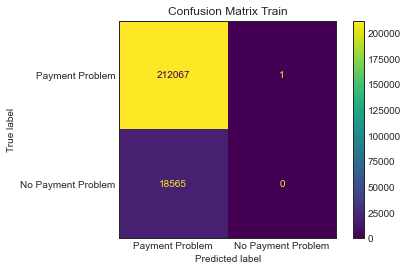

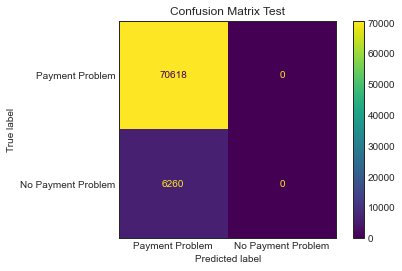

In [46]:
# Logistic Regression w/o resampling

# Model
clf_LR = LogisticRegression()
clf_LR = clf_LR.fit(X_train,Y_train)

# Predict
Y_pred_train = clf_LR.predict(X_train)
Y_pred_test = clf_LR.predict(X_test)

# Evaluation
F1_LR = evalscore(Y_train, Y_test, Y_pred_train, Y_pred_test)
print()
confmat_show(Y_pred_train, Y_train, Y_pred_test, Y_test)

`Insight` : `Logistic Regression w/o resampling`

Logistic Regression w/o resampling give very bad result, where model predicted all clients as `Have Payment Problem`. F1-Score from this model is also bad with 0,00 value.

`-------------------------------------------------------------------------------------------------------------------------------`

Train Accuracy: 0.577919810940731
Test Accuracy: 0.5746394908563602
Train F1-Score: 0.5709137568593191
Test F1-Score: 0.5613160518444666



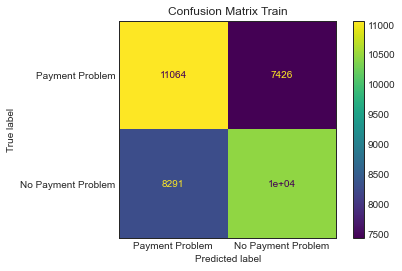

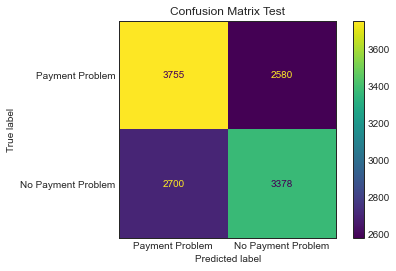

In [47]:
# Logistic Regression w/ undersampling

# Model
clf_LR_u = LogisticRegression()
clf_LR_u = clf_LR_u.fit(X_train_u,Y_train_u)

# Predict
Y_pred_train = clf_LR_u.predict(X_train_u)
Y_pred_test = clf_LR_u.predict(X_test_u)

# Evaluation
F1_LR_u = evalscore(Y_train_u, Y_test_u, Y_pred_train, Y_pred_test)
print()
confmat_show(Y_pred_train, Y_train_u, Y_pred_test, Y_test_u)

`Insight` : `Logistic Regression w/ undersampling`

Logistic Regression w/ undersampling give bad result, where model successful predicted 50% clients in their respective class. F1-Score from this model is bad with 0.55-0.56 value.

`-------------------------------------------------------------------------------------------------------------------------------`

Train Accuracy: 0.5760337146751755
Test Accuracy: 0.5782599775015388
Train F1-Score: 0.5588151565721017
Test F1-Score: 0.5601581984268702



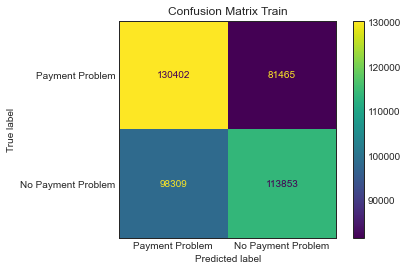

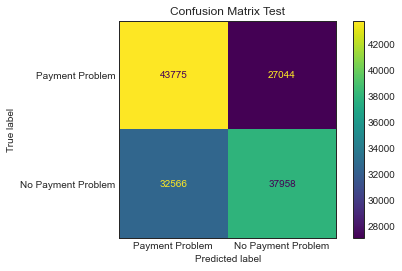

In [48]:
# Logistic Regression w/ oversampling

# Model
clf_LR_o = LogisticRegression()
clf_LR_o = clf_LR_o.fit(X_train_o,Y_train_o)

# Predict
Y_pred_train = clf_LR_o.predict(X_train_o)
Y_pred_test = clf_LR_o.predict(X_test_o)

# Evaluation
F1_LR_o = evalscore(Y_train_o, Y_test_o, Y_pred_train, Y_pred_test)
print()
confmat_show(Y_pred_train, Y_train_o, Y_pred_test, Y_test_o)

`Insight` : `Logistic Regression w/ oversampling`

Logistic Regression w/ oversampling give bad result, where model successful predicted 50% clients in their respective class. F1-Score from this model is bad with 0.55-0.56 value.

`-------------------------------------------------------------------------------------------------------------------------------`

`(2) Decision Tree`

Train Accuracy: 1.0
Test Accuracy: 0.8503603111423294
Train F1-Score: 1.0
Test F1-Score: 0.14709371293001186



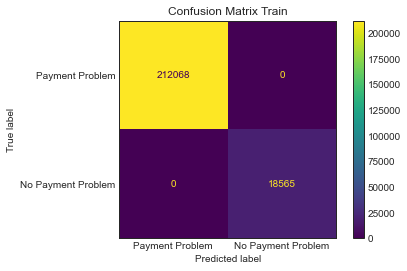

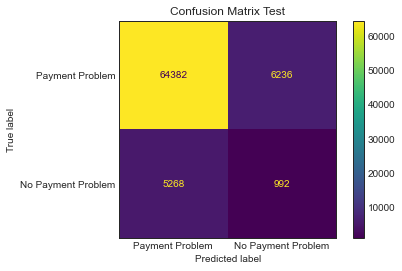

In [49]:
# Decision Tree w/o resampling

# Model
clf_DT = DecisionTreeClassifier()
clf_DT = clf_DT.fit(X_train,Y_train)

# Predict
Y_pred_train = clf_DT.predict(X_train)
Y_pred_test = clf_DT.predict(X_test)

# Evaluation
F1_DT = evalscore(Y_train, Y_test, Y_pred_train, Y_pred_test)
print()
confmat_show(Y_pred_train, Y_train, Y_pred_test, Y_test)

`Insight` : `Decision Tree w/o resampling`

Decision Tree w/o resampling give pretty good result, where model successful predicted 84% clients in their respective class in validation dataset. however, F1-Score from this model in validation dataset is bad with 0.14 value. That means this model has tendency toward class 0

`-------------------------------------------------------------------------------------------------------------------------------`

Train Accuracy: 1.0
Test Accuracy: 0.5798759365181665
Train F1-Score: 1.0
Test F1-Score: 0.5743204636356216



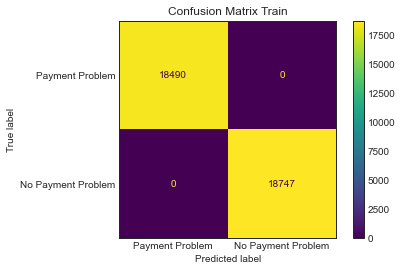

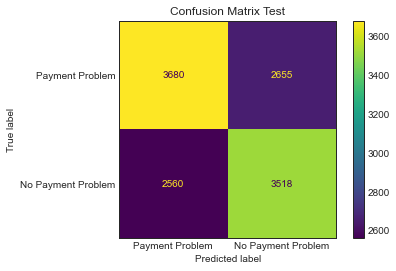

In [50]:
# Decision Tree w/ undersampling

# Model
clf_DT_u = DecisionTreeClassifier()
clf_DT_u = clf_DT_u.fit(X_train_u,Y_train_u)

# Predict
Y_pred_train = clf_DT_u.predict(X_train_u)
Y_pred_test = clf_DT_u.predict(X_test_u)

# Evaluation
F1_DT_u = evalscore(Y_train_u, Y_test_u, Y_pred_train, Y_pred_test)
print()
confmat_show(Y_pred_train, Y_train_u, Y_pred_test, Y_test_u)

`Insight` : `Decision Tree w/ undersampling`

Decision Tree w/ undersampling give bad result, where model successful predicted 58% clients in their respective class in validation dataset. F1-Score from this model in validation dataset is also mediocre with 0.57 value.

`-------------------------------------------------------------------------------------------------------------------------------`

Train Accuracy: 1.0
Test Accuracy: 0.9508642097592381
Train F1-Score: 1.0
Test F1-Score: 0.9530670306872013



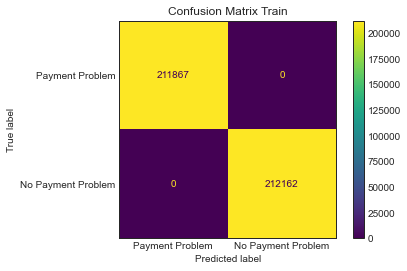

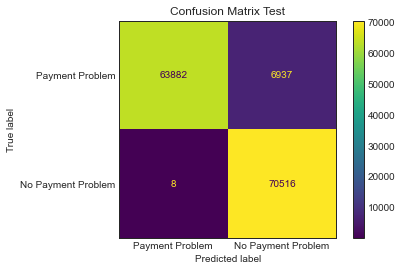

In [51]:
# Decision Tree w/ oversampling

# Model
clf_DT_o = DecisionTreeClassifier()
clf_DT_o = clf_DT_o.fit(X_train_o,Y_train_o)

# Predict
Y_pred_train = clf_DT_o.predict(X_train_o)
Y_pred_test = clf_DT_o.predict(X_test_o)

# Evaluation
F1_DT_o = evalscore(Y_train_o, Y_test_o, Y_pred_train, Y_pred_test)
print()
confmat_show(Y_pred_train, Y_train_o, Y_pred_test, Y_test_o)

`Insight` : `Decision Tree w/ oversampling`

Decision Tree w/ oversampling give good result, where model successful predicted 95% clients in their respective class in validation dataset. and also, F1-Score from this model in validation dataset was good with 0.95 value.

`-------------------------------------------------------------------------------------------------------------------------------`

`(3) Random Forest`

Train Accuracy: 0.9999826564281781
Test Accuracy: 0.918728374827649
Train F1-Score: 0.9998922587943759
Test F1-Score: 0.004778591908251036



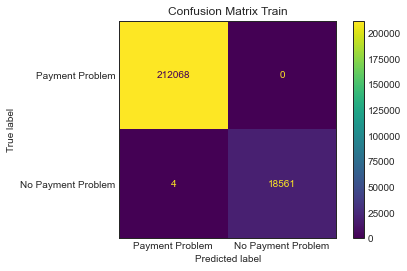

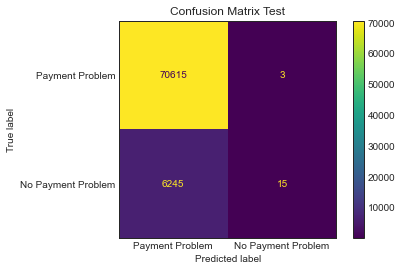

In [52]:
# Random Forest w/o resampling

# Model
clf_RF = RandomForestClassifier()
clf_RF = clf_RF.fit(X_train,Y_train)

# Predict
Y_pred_train = clf_RF.predict(X_train)
Y_pred_test = clf_RF.predict(X_test)

# Evaluation
F1_RF = evalscore(Y_train, Y_test, Y_pred_train, Y_pred_test)
print()
confmat_show(Y_pred_train, Y_train, Y_pred_test, Y_test)

`Insight` : `Random Forest w/o resampling`

Random Forest w/o resampling give bad result, where model successful predicted 91% clients in their respective class in validation dataset. Hovewer, F1-Score from this model in validation dataset is very bad with only 0.05 value. Its also indicates this model had tendency toward class 0 (majority class)

`-------------------------------------------------------------------------------------------------------------------------------`

Train Accuracy: 1.0
Test Accuracy: 0.675501490372996
Train F1-Score: 1.0
Test F1-Score: 0.668149612786291



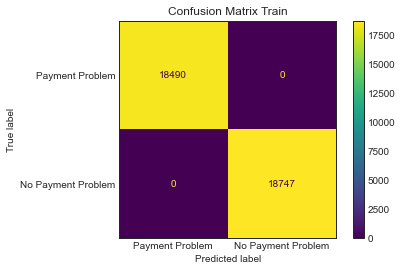

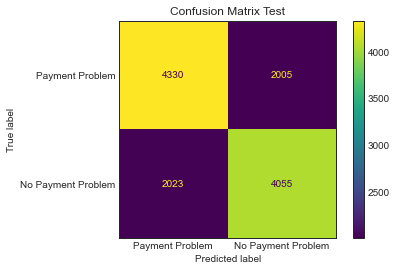

In [53]:
# Random Forest w/ undersampling

# Model
clf_RF_u = RandomForestClassifier()
clf_RF_u = clf_RF_u.fit(X_train_u,Y_train_u)

# Predict
Y_pred_train = clf_RF_u.predict(X_train_u)
Y_pred_test = clf_RF_u.predict(X_test_u)

# Evaluation
F1_RF_u = evalscore(Y_train_u, Y_test_u, Y_pred_train, Y_pred_test)
print()
confmat_show(Y_pred_train, Y_train_u, Y_pred_test, Y_test_u)

`Insight` : `Random Forest w/ undersampling`

Random FOrest w/ oversampling give mediocre result, where model successful predicted 67% clients in their respective class in validation dataset. And also F1-Score from this model in validation dataset is very mediocre with only 0.66 value.

`-------------------------------------------------------------------------------------------------------------------------------`

Train Accuracy: 1.0
Test Accuracy: 0.9976652540274368
Train F1-Score: 1.0
Test F1-Score: 0.9976655678329396



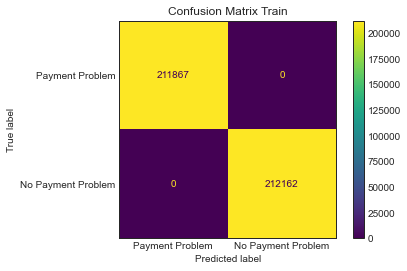

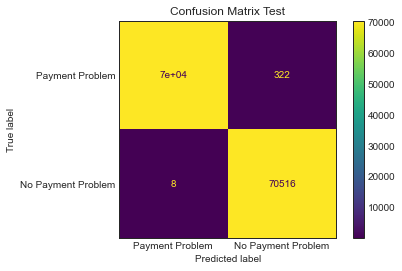

In [54]:
# Random Forest w/ oversampling

# Model
clf_RF_o = RandomForestClassifier()
clf_RF_o = clf_RF_o.fit(X_train_o,Y_train_o)

# Predict
Y_pred_train = clf_RF_o.predict(X_train_o)
Y_pred_test = clf_RF_o.predict(X_test_o)

# Evaluation
F1_RF_o = evalscore(Y_train_o, Y_test_o, Y_pred_train, Y_pred_test)
print()
confmat_show(Y_pred_train, Y_train_o, Y_pred_test, Y_test_o)

`Insight` : `Random Forest w/ oversampling`

Random Forest w/ oversampling give amazing result, where model successful predicted 99.7% clients in their respective class in validation dataset. And also F1-Score from this model in validation dataset is very good with 0.997 value.

`-------------------------------------------------------------------------------------------------------------------------------`

`(4) K Nearest Neighbour`

Train Accuracy: 0.9219886139450989
Test Accuracy: 0.9120034340123312
Train F1-Score: 0.1331663133551744
Test F1-Score: 0.03205036485906425



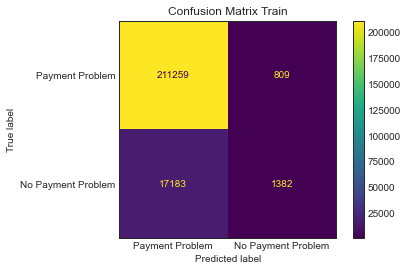

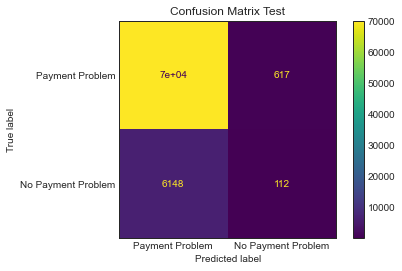

In [55]:
# KNN w/o resampling

# Model
clf_KN = KNeighborsClassifier()
clf_KN = clf_KN.fit(X_train,Y_train)

# Predict
Y_pred_train = clf_KN.predict(X_train)
Y_pred_test = clf_KN.predict(X_test)

# Evaluation
F1_KN = evalscore(Y_train, Y_test, Y_pred_train, Y_pred_test)
print()
confmat_show(Y_pred_train, Y_train, Y_pred_test, Y_test)

`Insight` : `KNN w/o resampling`

KNN w/o resampling give bad result, where model successful predicted 91% clients in their respective class in validation dataset. However, F1-Score from this model in validation dataset is bad with only 0.32 value. that means this model has tendency toward class 0 (majority class)

`-------------------------------------------------------------------------------------------------------------------------------`

Train Accuracy: 0.7156323012057899
Test Accuracy: 0.549343430274712
Train F1-Score: 0.7198751355784238
Test F1-Score: 0.5487981932569769



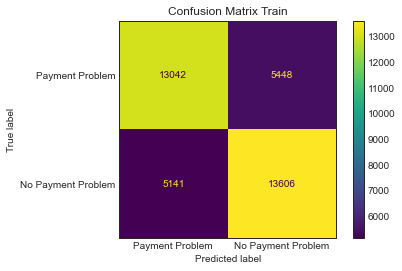

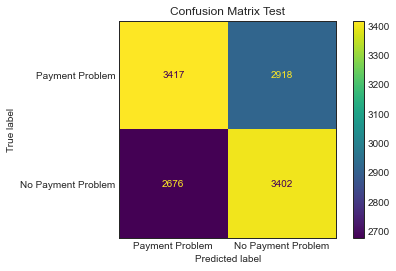

In [56]:
# KNN w/ undersampling

# Model
clf_KN_u = KNeighborsClassifier()
clf_KN_u = clf_KN_u.fit(X_train_u,Y_train_u)

# Predict
Y_pred_train = clf_KN_u.predict(X_train_u)
Y_pred_test = clf_KN_u.predict(X_test_u)

# Evaluation
F1_KN_u = evalscore(Y_train_u, Y_test_u, Y_pred_train, Y_pred_test)
print()
confmat_show(Y_pred_train, Y_train_u, Y_pred_test, Y_test_u)

`Insight` : `KNN w/ undersampling`

KNN w/ oversampling give pretty mediocre result, where model successful predicted 55% clients in their respective class in validation dataset. And also F1-Score from this model in validation dataset is mediocre with only 0.55 value.

`-------------------------------------------------------------------------------------------------------------------------------`

Train Accuracy: 0.9057234292937512
Test Accuracy: 0.8645776586035389
Train F1-Score: 0.913826998689384
Test F1-Score: 0.8800140415102146



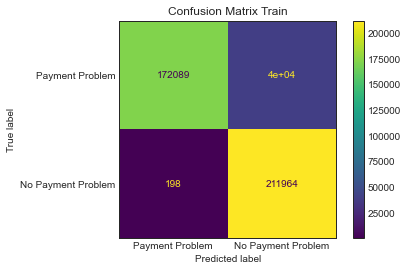

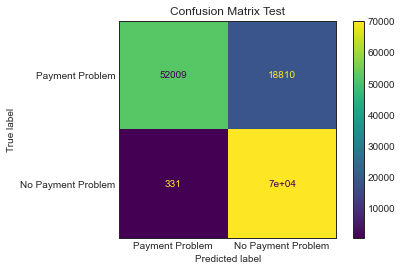

In [57]:
# KNN w/ oversampling

# Model
clf_KN_o = KNeighborsClassifier()
clf_KN_o = clf_KN_o.fit(X_train_o,Y_train_o)

# Predict
Y_pred_train = clf_KN_o.predict(X_train_o)
Y_pred_test = clf_KN_o.predict(X_test_o)

# Evaluation
F1_KN_o = evalscore(Y_train_o, Y_test_o, Y_pred_train, Y_pred_test)
print()
confmat_show(Y_pred_train, Y_train_o, Y_pred_test, Y_test_o)

`Insight` : `KNN w/ oversampling`

KNN w/ oversampling give pretty good result, where model successful predicted 86.4% clients in their respective class in validation dataset. And also F1-Score from this model in validation dataset is pretty good with 0.88 value.

`---------------------------------------------------- SELECTING THE BEST MODEL ----------------------------------------------------`

In [58]:
# Make the Dataframe
a = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K Nearest Neighbour']; b = ['Without Resampling', 'Undersampling', 'Oversampling']
c = [F1_LR[0], F1_LR_u[0], F1_LR_o[0], F1_DT[0], F1_DT_u[0], F1_DT_o[0], F1_RF[0], F1_RF_u[0], F1_RF_o[0], F1_KN[0], F1_KN_u[0], F1_KN_o[0]]
c = [ '%.4f' %elem for elem in c]
d = [F1_LR[1], F1_LR_u[1], F1_LR_o[1], F1_DT[1], F1_DT_u[1], F1_DT_o[1], F1_RF[1], F1_RF_u[1], F1_RF_o[1], F1_KN[1], F1_KN_u[1], F1_KN_o[1]]
d = [ '%.4f' %elem for elem in d]

from itertools import product
Compare = pd.DataFrame(list(product(a, b)), columns=['Model', 'Resampling Method'])
Compare['F1-Score Train'] = c
Compare['F1-Score Test'] = d
print(tabulate(Compare, headers = 'keys', tablefmt = 'grid'))

+----+---------------------+---------------------+------------------+-----------------+
|    | Model               | Resampling Method   |   F1-Score Train |   F1-Score Test |
+====+=====================+=====================+==================+=================+
|  0 | Logistic Regression | Without Resampling  |           0      |          0      |
+----+---------------------+---------------------+------------------+-----------------+
|  1 | Logistic Regression | Undersampling       |           0.5709 |          0.5613 |
+----+---------------------+---------------------+------------------+-----------------+
|  2 | Logistic Regression | Oversampling        |           0.5588 |          0.5602 |
+----+---------------------+---------------------+------------------+-----------------+
|  3 | Decision Tree       | Without Resampling  |           1      |          0.1471 |
+----+---------------------+---------------------+------------------+-----------------+
|  4 | Decision Tree       | Und

In [97]:
Compare

,Model,Resampling Method,F1-Score Train,F1-Score Test
0,Logistic Regression,Without Resampling,0.0000,0.0000
1,Logistic Regression,Undersampling,0.5709,0.5613
2,Logistic Regression,Oversampling,0.5588,0.5602
3,Decision Tree,Without Resampling,1.0000,0.1471
4,Decision Tree,Undersampling,1.0000,0.5743
5,Decision Tree,Oversampling,1.0000,0.9531
6,Random Forest,Without Resampling,0.9999,0.0048
7,Random Forest,Undersampling,1.0000,0.6681
8,Random Forest,Oversampling,1.0000,0.9977
9,K Nearest Neighbour,Without Resampling,0.1332,0.0321


From The Validation using F1-Score, The best model is `Random Forest with Oversampling`. So I choose that model & resampling method as main tools to predict upcoming data/clients

We can see the importance of each column (feature) via `feature importance` in random forest model

Text(0.5, 0, 'Random Forest Feature Importance')

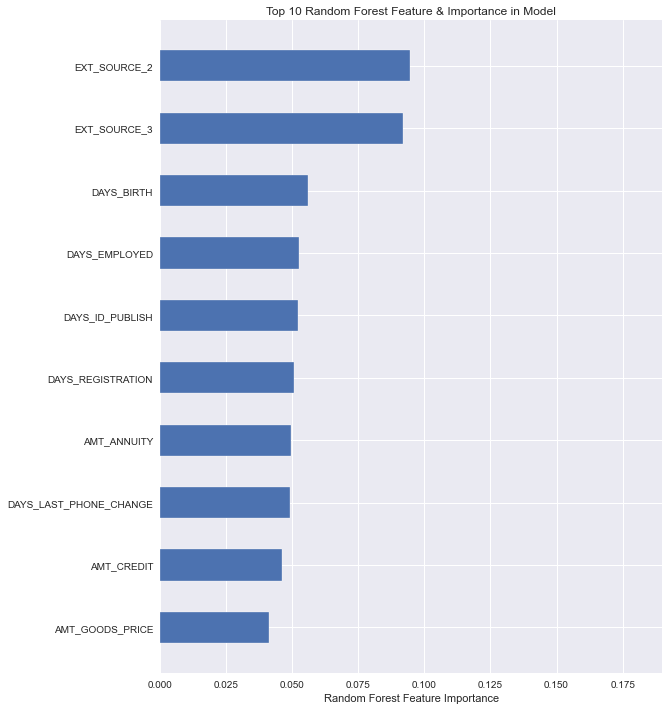

In [93]:
# Feature Importance
sorted_ftr = clf_RF_o.feature_importances_.argsort()[-10:]
plt.style.use('seaborn')
plt.gcf().set_size_inches(9, 12)
plt.barh(X.columns[sorted_ftr], clf_RF_o.feature_importances_[sorted_ftr], height=0.5)
plt.xlim(0,0.19)
plt.title("Top 10 Random Forest Feature & Importance in Model")
plt.xlabel("Random Forest Feature Importance")

From Feature importance, we can conclude that:

- Most Important Feature : `EXT_SOURCE_2`, `EXT_SOURCE_3`, and `DAYS_BIRTH`

- Most Not Important Feature : `FLAG_DOCUMENT_12`, `FLAG_MOBIL`, `FLAG_DOCUMENT_10`

`Most Important Variable : EXT_SOURCE_2`

Text(0.5, 1.0, 'Most Important Variable : EXT_SOURCE_2 Distribution')

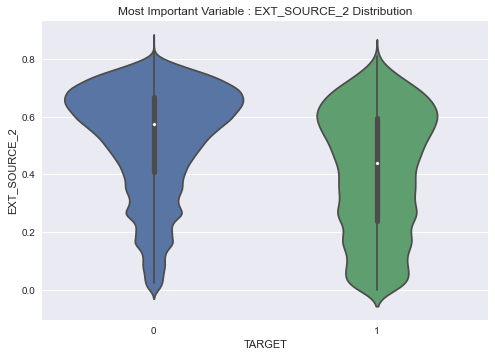

In [95]:
# Most Important Variable : EXT_SOURCE_2 Plot
sns.violinplot(data = Train_Data_Backup, x = 'TARGET', y = 'EXT_SOURCE_2')
plt.title('Most Important Variable : EXT_SOURCE_2 Distribution')

`Insight` : `EXT_SOURCE_2`

from the plot, Client with Target = 0 or doesnt have any problem in paying credit mostly has high value of `EXT_SOURCE_2`

`--------------------------------------------------------------------------------------------------------------------------------`

`Most Important Variable : EXT_SOURCE_3`

Text(0.5, 1.0, 'Most Important Variable : EXT_SOURCE_3 Distribution')

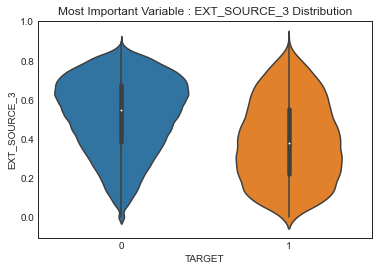

In [80]:
# Most Important Variable : EXT_SOURCE_3 Plot
sns.violinplot(data = Train_Data_Backup, x = 'TARGET', y = 'EXT_SOURCE_3')
plt.title('Most Important Variable : EXT_SOURCE_3 Distribution')

`Insight` : `EXT_SOURCE_3`

Same with `EXT_SOURCE_2` from the plot, Client with Target = 0 or doesnt have any problem in paying credit mostly has high value of `EXT_SOURCE_3`


# Predict Test Data

Next step is predicting test data (data without target) using best model (in this case `Random Forest` that i made using oversampling method)

Test Data has been loaded in the start of code

`---------------------------------------------------- TEST DATA CLEANING ----------------------------------------------------`

In the cleaning of test data, i avoid cleaning method that can eliminate/delete/modify any rows value like `Duplicate Cleaning` and `Impossible Value Transforming`.

But i will using `Missing Data Imputation` (Model cannot predict clients target if there is any null value)

In [60]:
# Choose Categorical Feature and Missing Data Imputation
numerical_vars = []
categorical_vars = []

for i in Test_Data.columns:
    if Test_Data[i].dtype == 'object':
        categorical_vars.append(i)
    else:
        numerical_vars.append(i)

# Numerical Variable Missing Data Treatment
for column in numerical_vars:
    Test_Data[column].fillna(Test_Data[column].median(), inplace = True)

# Categorical Variable Missing Data Treatment
for column in categorical_vars:
    Test_Data[column].fillna(Test_Data[column].mode()[0], inplace = True)

# Missing Data in Column Kiling (In case we replace NA with Na in a column)
for column in Test_Data.columns:
    Test_Data = Test_Data.fillna(Test_Data.median())

# Checking Missing Data Status
Test_Data.isna().sum().sum()

0

There is no missing data in the dataframe

Next step is slicing the dataframe, only the feature used in model can be passsed. Also doont forget to label transform the categorical feature

In [61]:
# Save The ID
ID_Test = Test_Data['SK_ID_CURR']

# Slice the Dataframe that only feature used in the model left
Dropped_Col = list(set(Test_Data.columns) - set(X.columns))
Test_Data.drop(Dropped_Col, inplace=True, axis=1)

# Labeling Transform for All Categorical Variable
numerical_vars = []
categorical_vars = []

for i in Test_Data.columns:
    if Test_Data[i].dtype == 'object':
        categorical_vars.append(i)
    else:
        numerical_vars.append(i)

Test_Data[categorical_vars] = Test_Data[categorical_vars].apply(preprocessing.LabelEncoder().fit_transform)

`---------------------------------------------------- TEST DATA PREDICTING ----------------------------------------------------`

Predicting The Clients Classes in Test Data! (using the best model in train data)

In [66]:
# Predicting Target from X Test
Target_Predicted = clf_RF_o.predict(Test_Data)
Target_Predicted = [int(x) for x in list(Target_Predicted)]

In [69]:
# Print Sneak Peek of The Data
Test_Data['TARGET'] = Target_Predicted
Test_Data['SK_ID_CURR'] = ID_Test
print(tabulate(Test_Data.sample(10, random_state=10), headers = 'keys', tablefmt = 'grid'))

+-------+----------------------+---------------+----------------+-------------------+----------------+--------------------+--------------+---------------+-------------------+-------------------+--------------------+-----------------------+----------------------+---------------------+------------------------------+--------------+-----------------+---------------------+-------------------+--------------+------------------+-------------------+--------------------+--------------+--------------+-------------------+-------------------+------------------------+-------------------------------+------------------------------+---------------------------+------------------------------+------------------------------+-------------------------------+--------------------------+--------------------------+---------------------------+----------------+----------------+----------------------------+----------------------------+----------------------------+----------------------------+-----------------------

In [72]:
# Test Data Target Profile
Test_Data.groupby('TARGET')['SK_ID_CURR'].count()

TARGET
0    48744
Name: SK_ID_CURR, dtype: int64

From test data, No client forecasted to be `target = 1` or will have problem in paying back debt. So in general and based to the train data, It safe to assume that the new clients (in the test data), will not have or have minimum problem of paying back credit (hopefully).

In [78]:
# Export the Data as Submission.csv
Submission = Test_Data[['SK_ID_CURR','TARGET']].copy()
Submission.to_csv("D:/[P]roject/Pasca-Kuliah/Course/Rakamin/VIX/Home Credit/Task/Data/submission_test.csv", index = False)